In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data  = pd.read_csv('/content/Customer Churn.csv')

In [3]:
df=pd.DataFrame(data)
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [4]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing Blanks with 0 as tenure is 0 and total charges are recorded

In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(' ','0').astype('float')

In [7]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.duplicated().sum()

0

# Converting values into "yes" or "NO

In [10]:
def convert(value):
  if value == 1:
    return "yes"
  else:
    return "no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(convert)

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


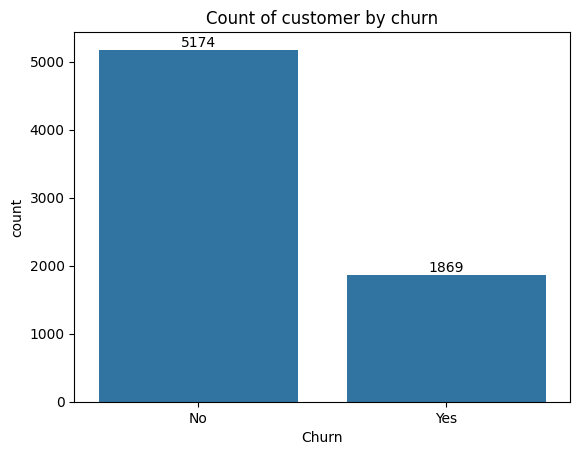

In [24]:
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by churn")
plt.show()


# Through Pie Chart

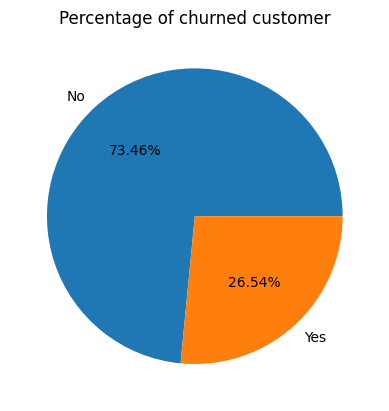

In [25]:
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'],labels = gb.index,autopct='%1.2f%%')
plt.title('Percentage of churned customer')
plt.show()

# Churn by Gender

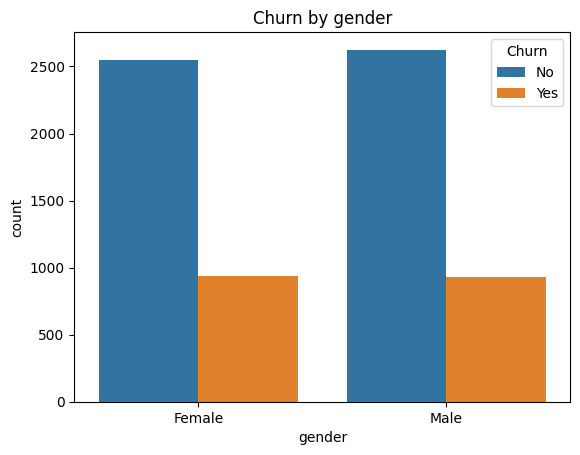

In [16]:
sns.countplot(x= 'gender',data = df,hue = 'Churn')
plt.title('Churn by gender')
plt.show()

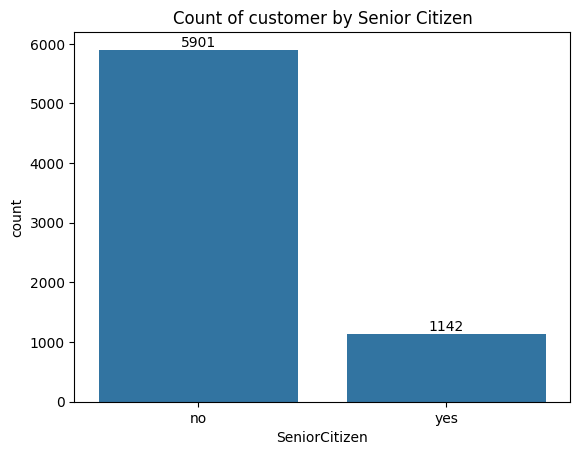

In [17]:
ax= sns.countplot(x=df['SeniorCitizen'],data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Senior Citizen")
plt.show()


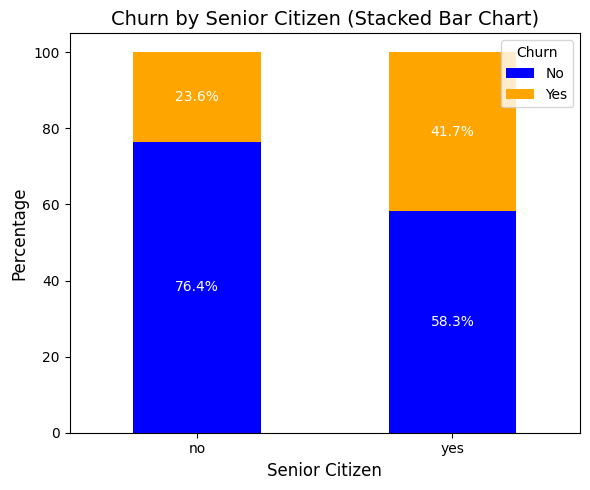

In [18]:

data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart with custom colors (blue and orange)
ax = data_percentage.plot(
    kind='bar',
    stacked=True,
    figsize=(6, 5),
    color=['blue', 'orange']
)

# Annotate each bar with percentages
for i, (senior, row) in enumerate(data_percentage.iterrows()):
    cumulative = 0
    for churn, value in row.items():
        plt.text(
            i,
            cumulative + value / 2,
            f'{value:.1f}%',
            ha='center',
            va='center',
            color='white',
            fontsize=10
        )
        cumulative += value

# Add labels, title, and legend
plt.title('Churn by Senior Citizen (Stacked Bar Chart)', fontsize=14)
plt.xlabel('Senior Citizen', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Churn', loc='upper right', fontsize=10)
plt.xticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


##Comparative a greated percentage of people in senior citizen category have churned.

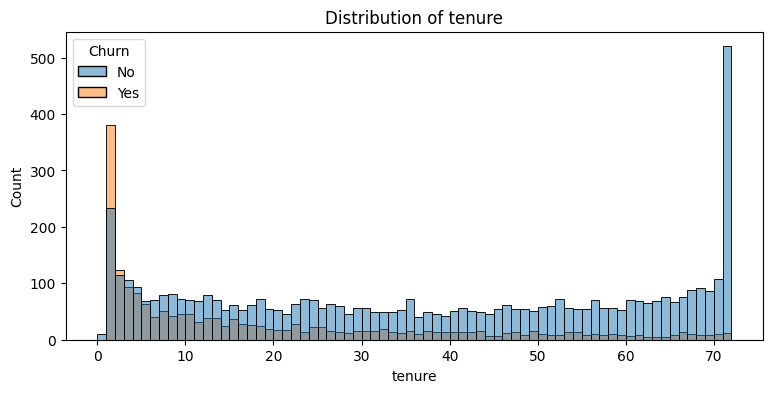

In [19]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data = df,bins = 72,hue = 'Churn',color = 'blue')
plt.title('Distribution of tenure')
plt.show()

###People who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned

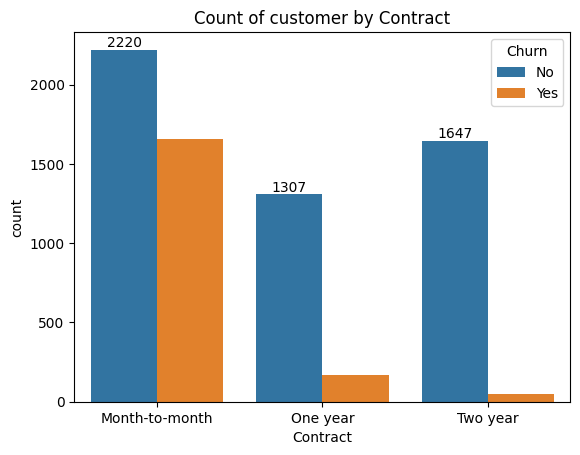

In [20]:
ax= sns.countplot(x=df['Contract'],data = df,hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Contract")
plt.show()

###People who have month to month contract are likely to churn then from those who have 1 or 2 years or contract.

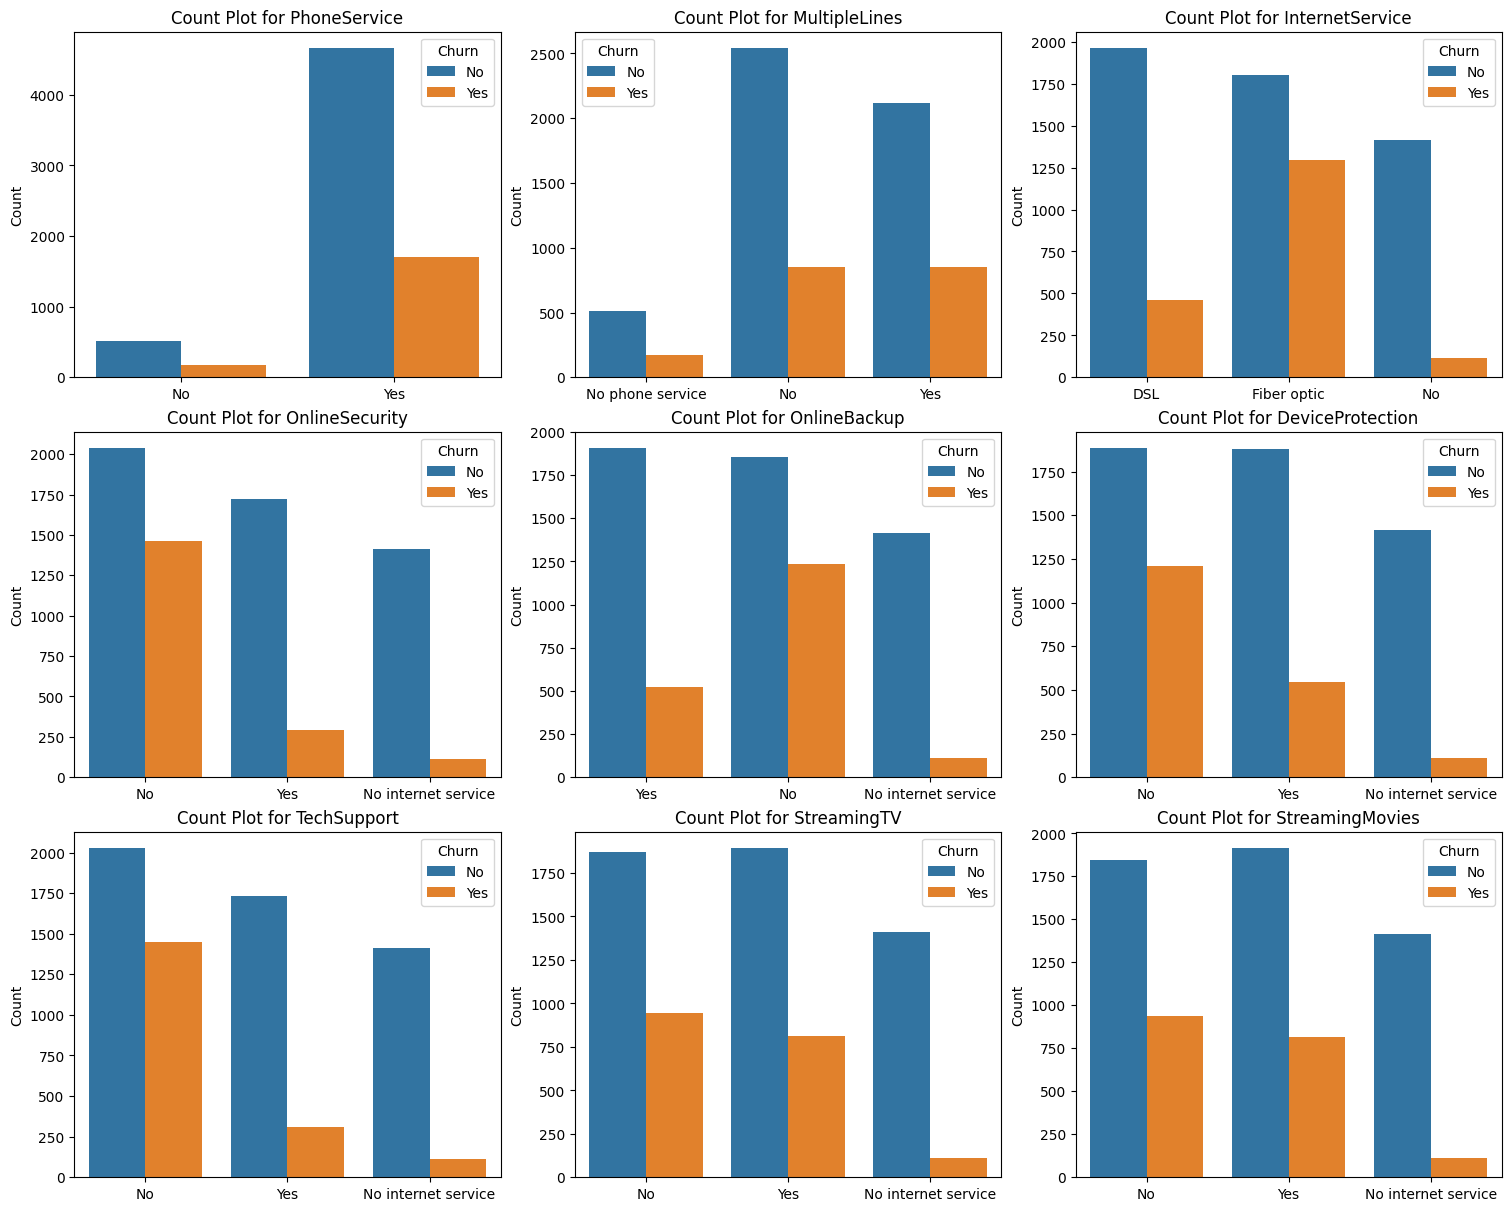

In [21]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure and axes for subplots
n_cols = 3  # Number of columns in the subplot grid
n_rows = -(-len(columns) // n_cols)  # Calculate number of rows (ceiling division)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12), constrained_layout=True)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Create count plots for each column
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue='Churn')
    axes[i].set_title(f'Count Plot for {column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Display the plots
plt.show()

The data indicates that customers with month-to-month contracts are more likely to churn compared to those with longer contracts. Churn rates are higher among customers who do not use internet services or lack additional features such as online security, backups, or tech support. Additionally, customers with streaming services tend to have lower churn rates, showing a preference for retaining entertainment-related services.

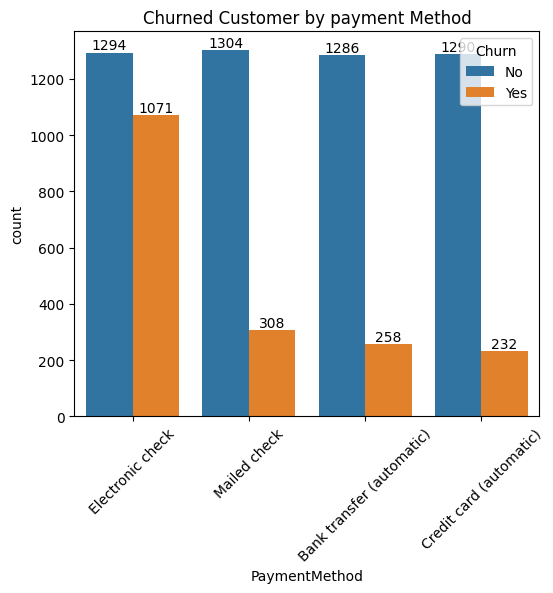

In [22]:
plt.figure(figsize=(6,5))
ax= sns.countplot(x='PaymentMethod',data = df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customer by payment Method")
plt.xticks(rotation = 45)
plt.show()

###Customer is likely to churn when he is using electronic check as a payment method